# 딥러닝 알고리즘
- 각 인풋과 연결되는 뉴런에서 가중치 계산 + bias
- 인공신경망에서는 교차 검증보다는 검증 세트를 이용한다. -> 데이터가 크기 때문에 검증 점수가 안정적이고, 교차 검증 사용하게 되면 시간이 오래 걸리기 때문
- 분류문제는 마지막 층에 활성화 함수 사용, 회귀는 출력이 임의의 숫자이므로 미사용(activation에 미지정)
- hitory에 모델 학습 정보가 있다
- 콜백을 통해 훈련 과정 중간에 어떤 작업을 수행할 수 있게 하며, fit할 때 매개변수로 전달한다. 콜백 종류는 ModelCheckpoint를 통해 에포크(또는 최상만)별로 모델저장, early stopping 등을 할 수 있다

**하이퍼파리미터**

|Title|Param|Value|Default|Note|
|--|--|--|--|--|
|손실함수|loss|'binary_categorical_crossentropy', 'sparse_categorical_crossentropy','categorical_crossentropy','mean_square_error' 등| None |y값 one-hot 안해도 된다(sparse사용)|
|배치|batch|number | 32 |fit할 때 batch size 조정가능|
|활성함수|activation|relu, sigmoid, softmax 등| None |각 층에|
|optimizer|optimizer|Adagard, RMSprop, Adam 등| RMSprop |가중치 및 절편을 학습하기 위한 방법|
|학습률|learning_rate|0.xxx ~ 1| 0.001(대부분의 optimizer에서) |학습률|
|verbose|verbose|0,1,2,3| 1 |학습과정을 보여준다|
|최적 weight 저장|restore_best_weights|true, false|-|학습에서 최상의 값을 저장한다|



*기술*
- Flatten 층 : 입력값을 1차원으로 하기 위한 층으로써, reshape, ravel과 같은 효과
- Dropout 층 : 과대적합 방지를 위해 설정하며, 비율 등에 따라 학습 때 비활성화 하게 한다
**Sample 규격**
``` 
model = keras.Sequential() # model 생성
model.add(keras.layers.Dense(1000, activation='relu', input_shape=(784,))) # input 값과 밀집층 뉴런 숫자
model.add(keras.layers.Dense(10, activation='softmax')) # 층을 추가 할 수 있다
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics='accuracy') # optimizer등 입력
model.fit(X_train, y_train, epochs = 5, validation_data = (X_test, y_test)) # epochs 및 validation 값등 option 가능
```

# MLP 
- d

In [4]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

from sklearn.tree import export_graphviz

In [5]:
mnist = keras.datasets.mnist.load_data()

In [3]:
(train_input, train_target), (test_input, test_target) = mnist

In [4]:
train_input.shape

(60000, 28, 28)

In [5]:
train_input_reshape = train_input.reshape(-1, 28 * 28)
test_input_reshape = test_input.reshape(-1, 28 * 28)

In [6]:
train_input_scaled = train_input_reshape / 255.
test_input_scaled = test_input_reshape / 255.

In [7]:
rf = RandomForestClassifier()

In [8]:
rf.fit(train_input_scaled, train_target)

RandomForestClassifier()

In [9]:
rf.score(test_input_scaled, test_target)

0.9709

In [10]:
rf.predict([train_input_reshape[17]])

array([8], dtype=uint8)

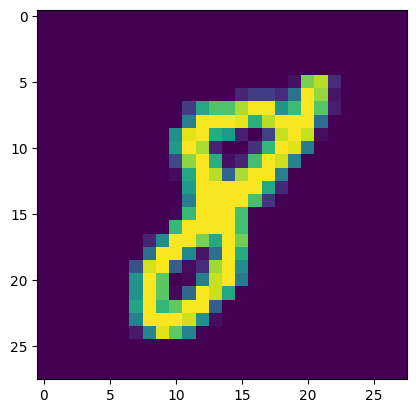

In [11]:
plt.imshow(train_input[17])

In [12]:
import numpy as np

In [13]:
len(np.bincount(train_target))

10

In [14]:
train_input_scaled = train_input / 255.
test_input_scaled = test_input / 255.

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_val, y_train, y_val =  train_test_split(train_input_scaled, train_target)

In [17]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('./model/best-model.h5', save_best_only=True)
earlystop_cb = keras.callbacks.EarlyStopping(patience= 2, restore_best_weights=True)

In [18]:
model =  keras.Sequential()

# model.add(keras.layers.Dense(100, activation='sigmoid', input_shape=(784,)))
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.3))
# model.add(keras.layers.Dense(2000, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

Metal device set to: AMD Radeon Pro 560X


2022-10-12 11:19:18.558855: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-12 11:19:18.559376: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-10-12 11:19:18.559427: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-12 11:19:18.559688: I tensorflow/core/common_runtime/pluggable_device/plug

In [19]:
opt = keras.optimizers.Adagrad()

In [20]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

In [21]:
history = model.fit(X_train, y_train, epochs=10, validation_data= (X_val, y_val), 
                   callbacks=[checkpoint_cb, earlystop_cb])

Epoch 1/10


2022-10-12 11:19:19.340914: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1407/1407 [==============================] - ETA: 0s - loss: 0.3593 - accuracy: 0.8967

2022-10-12 11:19:35.229106: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1407/1407 [==============================] - 19s 13ms/step - loss: 0.3593 - accuracy: 0.8967 - val_loss: 0.1942 - val_accuracy: 0.9440
Epoch 2/10
1407/1407 [==============================] - 19s 14ms/step - loss: 0.1833 - accuracy: 0.9459 - val_loss: 0.1580 - val_accuracy: 0.9537
Epoch 3/10
1407/1407 [==============================] - 19s 14ms/step - loss: 0.1405 - accuracy: 0.9580 - val_loss: 0.1283 - val_accuracy: 0.9635
Epoch 4/10
1407/1407 [==============================] - 19s 13ms/step - loss: 0.1182 - accuracy: 0.9636 - val_loss: 0.1115 - val_accuracy: 0.9678
Epoch 5/10
1407/1407 [==============================] - 19s 13ms/step - loss: 0.1005 - accuracy: 0.9684 - val_loss: 0.1093 - val_accuracy: 0.9666
Epoch 6/10
1407/1407 [==============================] - 18s 13ms/step - loss: 0.0892 - accuracy: 0.9726 - val_loss: 0.0988 - val_accuracy: 0.9715
Epoch 7/10
1407/1407 [==============================] - 18s 13ms/step - loss: 0.0816 - accuracy: 0.9745 - val_loss: 0.0986 - val_accura

In [22]:
earlystop_cb.stopped_epoch

0

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [24]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

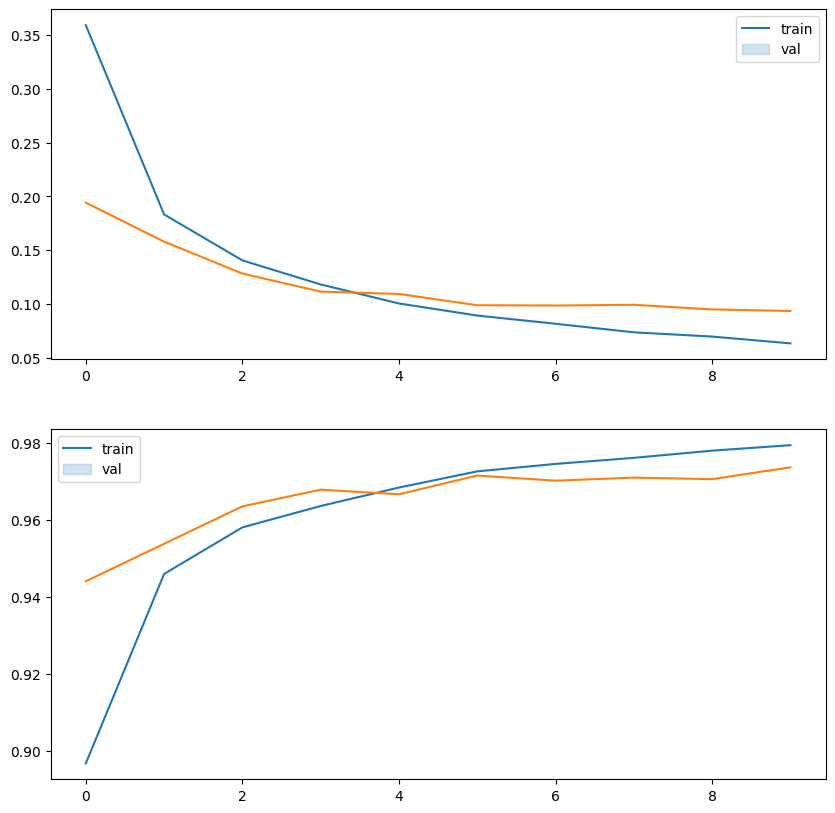

In [25]:
fig, axs = plt.subplots(2,1, figsize=(10,10))
sns.lineplot(history.history['loss'], ax=axs[0])
sns.lineplot(history.history['val_loss'], ax=axs[0])
sns.lineplot(history.history['accuracy'], ax=axs[1])
sns.lineplot(history.history['val_accuracy'], ax=axs[1])
axs[0].legend(['train', 'val'])
axs[1].legend(['train', 'val'])

In [26]:
model.evaluate(test_input, test_target)

 15/313 [>.............................] - ETA: 2s - loss: 14.5471 - accuracy: 0.9792  

2022-10-12 11:22:26.528177: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 3s 8ms/step - loss: 14.8648 - accuracy: 0.9740


[14.864779472351074, 0.9739999771118164]

In [27]:
np.argmax(model.predict(test_input_scaled[0].reshape(1,28,28)))

1/1 [==============================] - 0s 215ms/step


2022-10-12 11:22:29.380444: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7

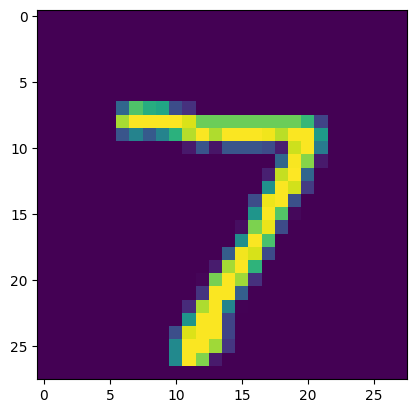

In [28]:
plt.imshow(test_input[0])

# CNN
- 뉴런을 커널 또는 필터라고 부른다

- 세임 패딩 : 입력과 특성 맵의 크기를 동일하게 만들기 위해 입력 주위에 0으로 패딩하는 것
- 밸리드 패딩 : 패딩 없이 순수한 입력 배열에서만 합성곱을 하여 특성 맵을 만드는 경우
- 스트라이드 : 특성 맵을 만들 때 커널의 이동 크기
- 풀링 : 합성곱 층에서 만든 특성 맵의 가로세로 크기를 줄이는 역할이며, 최대풀링(손실이 적기 때문에 더 선호 됨)과 평균풀링이 있다.
- 컬러 vs 흑백 : 차원의 수가 늘어난다고 할 수 있으며, 실질적으로 컬러는 마지막 차원이 3, 흑백은 1이라고 할 수 있다. 마찬가지로 합성곱 -> 합성곱을 할 때도 두번째 합성곱에 들어가는 input의 마지막 차원은 필터수라고 할 수 있다

> n * n * n의 이미지를 필터를 통해 맵을 만드는 합성곱층과 크기를 줄이는 풀링층으로 구성, 다시 반복도 가능. 그리고, 계산 된 값을 1차원으로 하여 신경망에 넣어 계산한다. 합성곱은 주변의 것들과 함께 특성을 파악하는 것 같은?

- ex(conv2d -> maxpooling -> conv2d -> maxpooling -> flatten -> dense -> dense)

**Sample 규격**
``` 
data를 reshape를 통해 차원을 맞추고 & 전처리를 한다
model = keras.Sequential() # model 생성
model.add(keras.layers.Conv2D(filter_number, kernel_size, activation, padding, input_shape) # input 값과 밀집층 뉴런 숫자
model.add(keras.layers.MaxPool2D(2)) # 풀링수행
```

In [29]:
from tensorflow import keras

In [30]:
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0
train_scaled, val_scaled, train_target, val_target = \
train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [31]:
train_scaled.shape

(48000, 28, 28, 1)

In [32]:
model = keras.Sequential()

In [33]:
model.add(keras.layers.Conv2D(32, kernel_size = 3, activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(keras.layers.MaxPool2D(2))

In [34]:
model.add(keras.layers.Conv2D(64, kernel_size = 3, activation='relu', padding='same'))
model.add(keras.layers.MaxPool2D(2))

In [35]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

In [36]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 3136)              0         
                                                                 
 dense_2 (Dense)             (None, 100)              

In [40]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

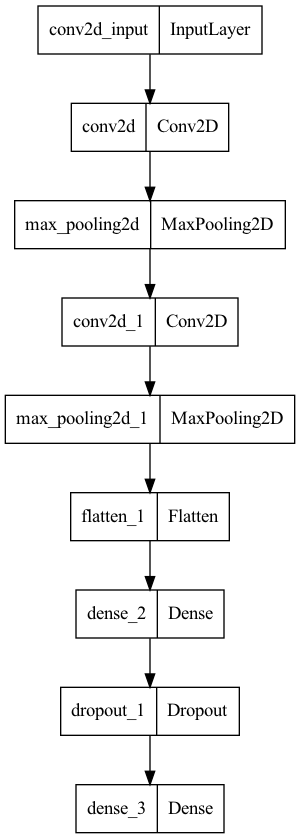

In [41]:
keras.utils.plot_model(model)

In [42]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5', save_best_only=True)
early_stopping_sb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20, 
                    validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_sb])

Epoch 1/20


2022-10-12 11:24:57.545467: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1499/1500 [============================>.] - ETA: 0s - loss: 0.4888 - accuracy: 0.8249

2022-10-12 11:25:21.997495: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1500/1500 [==============================] - 28s 17ms/step - loss: 0.4887 - accuracy: 0.8249 - val_loss: 0.3737 - val_accuracy: 0.8628
Epoch 2/20
1500/1500 [==============================] - 26s 17ms/step - loss: 0.3206 - accuracy: 0.8856 - val_loss: 0.2829 - val_accuracy: 0.8967
Epoch 3/20
1500/1500 [==============================] - 26s 17ms/step - loss: 0.2739 - accuracy: 0.9007 - val_loss: 0.2493 - val_accuracy: 0.9067
Epoch 4/20
1500/1500 [==============================] - 26s 17ms/step - loss: 0.2419 - accuracy: 0.9128 - val_loss: 0.2400 - val_accuracy: 0.9094
Epoch 5/20
1500/1500 [==============================] - 25s 17ms/step - loss: 0.2184 - accuracy: 0.9197 - val_loss: 0.2422 - val_accuracy: 0.9103
Epoch 6/20
1500/1500 [==============================] - 26s 17ms/step - loss: 0.1993 - accuracy: 0.9266 - val_loss: 0.2319 - val_accuracy: 0.9122
Epoch 7/20
1500/1500 [==============================] - 26s 17ms/step - loss: 0.1823 - accuracy: 0.9325 - val_loss: 0.2258 - val_accura

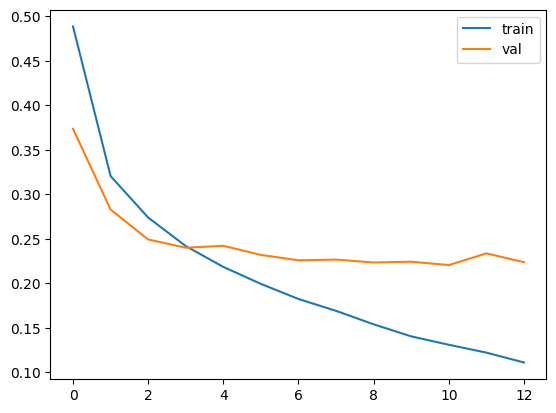

In [68]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train', 'val'])

In [47]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 4s 11ms/step - loss: 0.2205 - accuracy: 0.9216


[0.22047947347164154, 0.9215832948684692]

In [50]:
val_scaled[0].shape

(28, 28, 1)

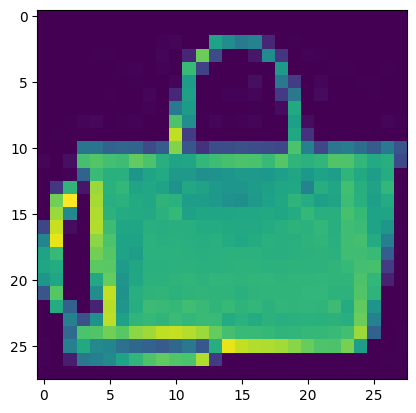

In [51]:
plt.imshow(val_scaled[0].reshape(28, 28))

In [61]:
# preds = model.predict(val_scaled[0].reshape(-1, 28, 28))
preds = model.predict(val_scaled[0:1])

1/1 [==============================] - 0s 25ms/step


In [62]:
np.argmax(preds)

8

([<matplotlib.axis.XTick at 0x7f9165adf2e0>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10')])

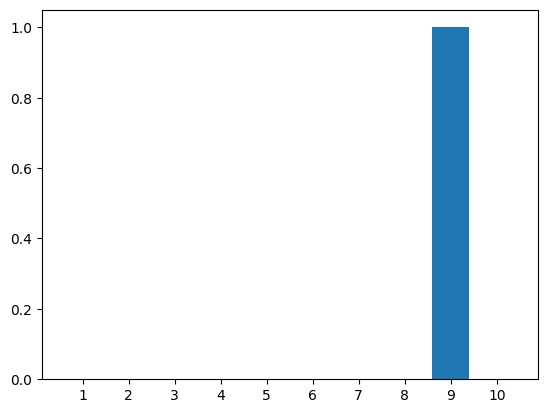

In [64]:
plt.bar(range(1, 11), preds[0])
plt.xticks(range(1, 11))

In [66]:
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0

In [67]:
model.evaluate(test_scaled, test_target)

  1/313 [..............................] - ETA: 1:33 - loss: 0.3072 - accuracy: 0.9062

2022-10-12 11:49:29.926886: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 4s 13ms/step - loss: 0.2452 - accuracy: 0.9152


[0.2452256977558136, 0.9151999950408936]

## CNN Visualization

In [124]:
model = keras.models.load_model('best-cnn-model.h5')

In [125]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 3136)              0         
                                                                 
 dense_2 (Dense)             (None, 100)              

In [126]:
model.layers

In [127]:
conv = model.layers[0]

In [128]:
conv.weights[0].shape

TensorShape([3, 3, 1, 32])

In [129]:
conv.weights[1].shape

TensorShape([32])

In [130]:
conv_weights = conv.weights[0].numpy()
print(conv_weights.mean(), conv_weights.std())

-0.020716676 0.25974146


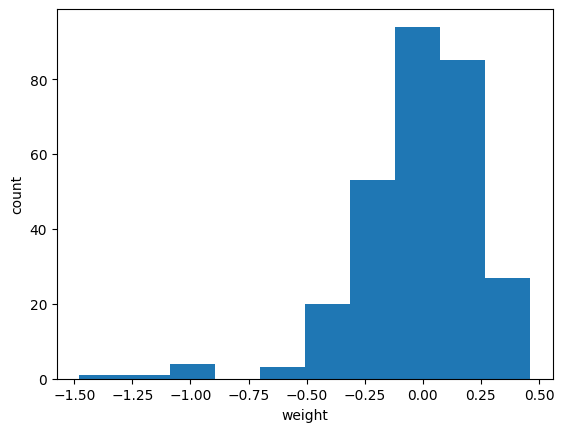

In [131]:
plt.hist(conv_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

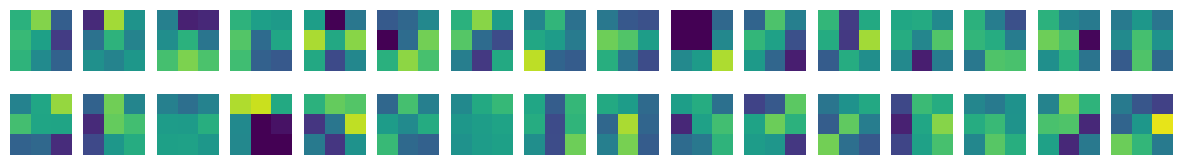

In [132]:
fig, axs = plt.subplots(2, 16, figsize=(15,2))
for i in range(2):
    for j in range(16):
        axs[i, j].imshow(conv_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=0.5)
        axs[i, j].axis('off')
plt.show()

In [133]:
no_training_model = keras.Sequential()
no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape= (28, 28, 1)))

In [134]:
no_training_conv = no_training_model.layers[0]
no_training_conv.weights[0].shape

TensorShape([3, 3, 1, 32])

In [135]:
no_training_weights = no_training_conv.weights[0].numpy()
print(no_training_weights.mean(), no_training_weights.std())

0.0063517634 0.083720915


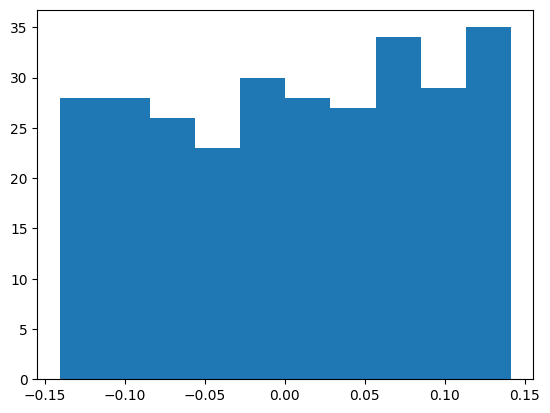

In [136]:
plt.hist(no_training_weights.reshape(-1, 1))
plt.show()

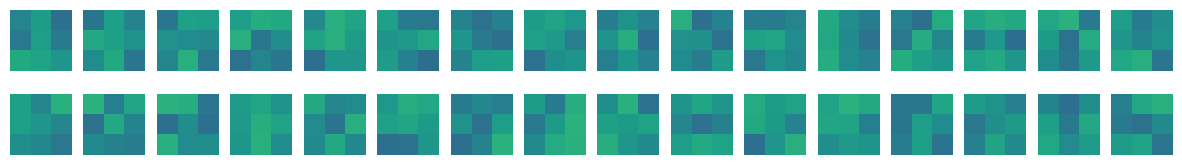

In [137]:
fig, axs = plt.subplots(2, 16, figsize=(15,2))
for i in range(2):
    for j in range(16):
        axs[i, j].imshow(no_training_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=0.5)
        axs[i, j].axis('off')
plt.show()

# 함수형 API
- 복잡한 모델을 만들때 사용하며, 각 층의 결괏값을 알 수 있다(ex. Conv2D 결과값)
- Model에서 input과 output을 지정하면, input부터 특정 레이어 까지의 결과를 알 수 있다

In [147]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 3136)              0         
                                                                 
 dense_2 (Dense)             (None, 100)              

In [148]:
conv_acti = keras.Model(model.input, model.layers[0].output)

In [151]:
(train_input, train_target), (test_input, test_target) = \
keras.datasets.fashion_mnist.load_data()

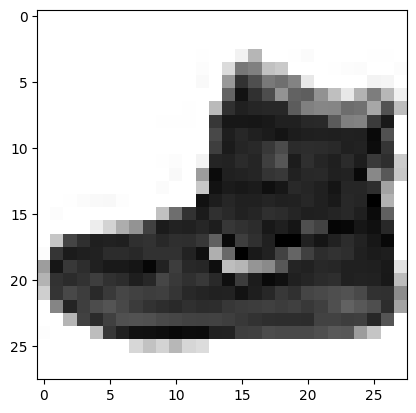

In [152]:
plt.imshow(train_input[0], cmap='gray_r')

In [153]:
inputs = train_input[0:1].reshape(-1, 28, 28, 1) / 255.

In [154]:
inputs.shape

(1, 28, 28, 1)

In [155]:
feature_maps = conv_acti.predict(inputs)

1/1 [==============================] - 0s 46ms/step


2022-10-12 22:43:13.968077: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [156]:
feature_maps.shape

(1, 28, 28, 32)

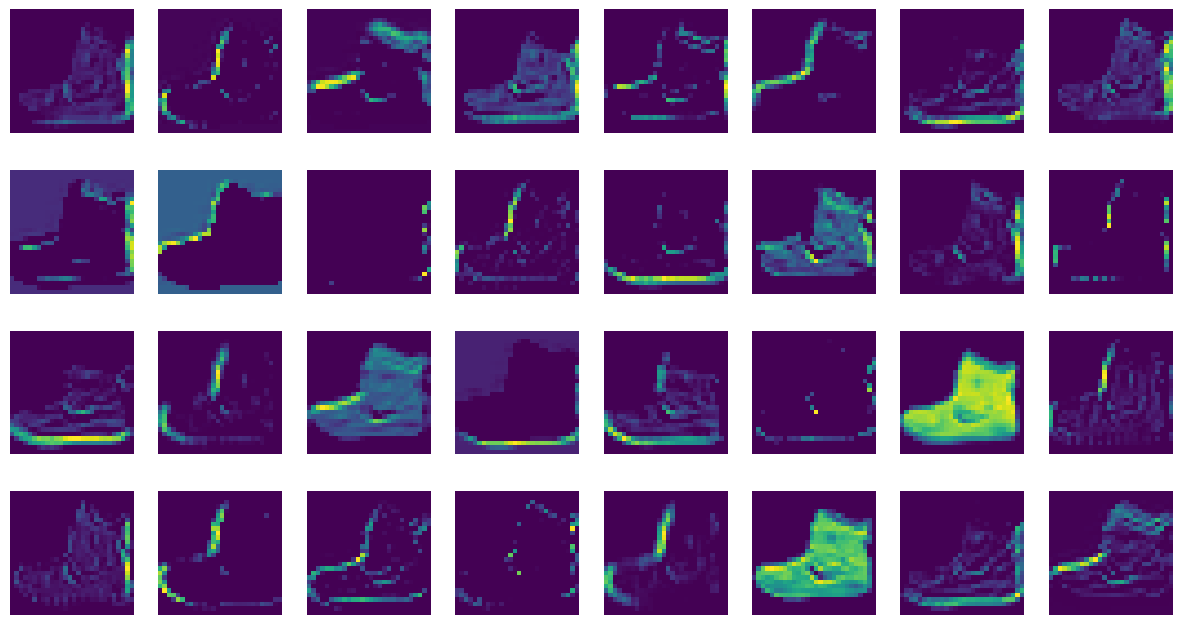

In [157]:
fig, axs = plt.subplots(4, 8, figsize=(15, 8))
for i in range(4):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0, :, : , i*8 + j])
        axs[i, j].axis('off')
plt.show()

In [158]:
conv2_acti = keras.Model(model.input, model.layers[2].output)

In [159]:
input = train_input[0:1].reshape(-1, 28, 28, 1) / 255.0
feature_maps = conv2_acti.predict(inputs)

1/1 [==============================] - 0s 76ms/step


2022-10-12 22:44:24.298398: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [160]:
feature_maps.shape

(1, 14, 14, 64)

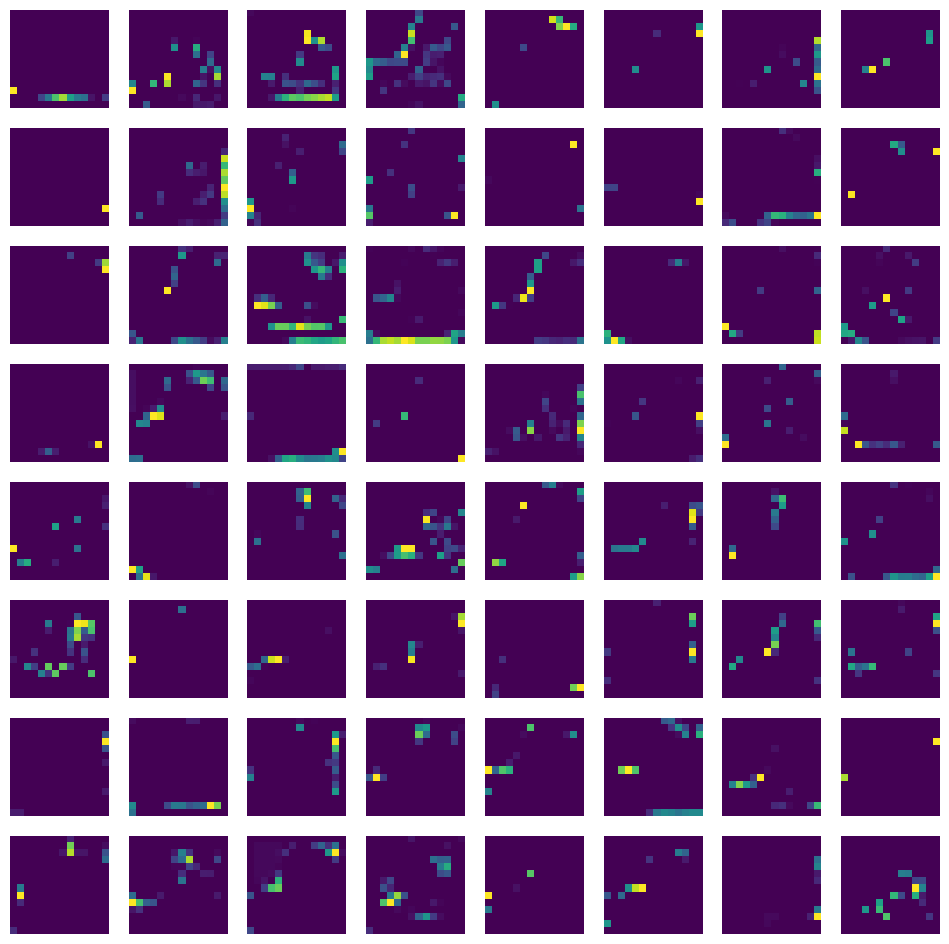

In [162]:
fig, axs = plt.subplots(8, 8, figsize=(12, 12))
for i in range(8):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0,:,:,i*8+j])
        axs[i, j].axis('off')
plt.show()

# 순환신경망
- 순차 데이터 : 텍스트나 시계열 데이터와 같이 순서에 의미가 있는 데이터
- 
> 이전 샘플 기억, 순환층에 은닉층도 서로 연결

In [16]:
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow import keras

In [27]:
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500)
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)


In [31]:
train_seq = pad_sequences(train_input, maxlen=100)
train_seq.shape

val_seq = pad_sequences(val_input, maxlen=100)

In [32]:
model = keras.Sequential()

model.add(keras.layers.SimpleRNN(8, input_shape=(100, 500)))
model.add(keras.layers.Dense(1, activation='sigmoid'))

train_oh = keras.utils.to_categorical(train_seq)
        

In [33]:
val_oh = keras.utils.to_categorical(val_seq)

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, 8)                 4072      
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 4,081
Trainable params: 4,081
Non-trainable params: 0
_________________________________________________________________


In [38]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])

In [41]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

history = model.fit(train_oh, train_target, epochs=100, batch_size=64, validation_data = (val_oh, val_target), 
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 14s 43ms/step - loss: 0.6980 - accuracy: 0.5031 - val_loss: 0.6971 - val_accuracy: 0.5068
Epoch 2/100
313/313 [==============================] - 12s 37ms/step - loss: 0.6950 - accuracy: 0.5128 - val_loss: 0.6955 - val_accuracy: 0.5092
Epoch 3/100
313/313 [==============================] - 11s 35ms/step - loss: 0.6926 - accuracy: 0.5225 - val_loss: 0.6940 - val_accuracy: 0.5144
Epoch 4/100
313/313 [==============================] - 11s 34ms/step - loss: 0.6905 - accuracy: 0.5307 - val_loss: 0.6925 - val_accuracy: 0.5208
Epoch 5/100
313/313 [==============================] - 11s 34ms/step - loss: 0.6884 - accuracy: 0.5408 - val_loss: 0.6912 - val_accuracy: 0.5266
Epoch 6/100
313/313 [==============================] - 11s 34ms/step - loss: 0.6864 - accuracy: 0.5502 - val_loss: 0.6898 - val_accuracy: 0.5312
Epoch 7/100
313/313 [==============================] - 11s 35ms/step - loss: 0.6843 - accuracy: 0.5602 - val_loss: 0.6882 - val_ac

In [1]:
# 자연어 처리

# 7. 텍스트 데이터
- 희소 행렬의 고차원 데이터셋에서는 LogisticRegression같은 선형 모델의 성능이 가장 뛰어나다

> 1. 텍스트들을 split 한다. 토크나이저 
    1.1 불용어, 맥스/미니멈 단어를 통해 불필요 단어를 제한한다
    1.2 유니그램 트라이그램 등 단어 묶음
>2. 어휘사전 구축 (정리 된 단어들에 대해 번호를 매긴다)
>3. 인코딩 (원핫처럼 표현) -> TFIDF를 사용하여 스케일링


In [11]:
from sklearn.datasets import load_files
import numpy as np
import pandas as pd

In [5]:
reviews_train = load_files('data/aclImdb/train/')

In [6]:
text_train, y_train = reviews_train.data, reviews_train.target

In [7]:
text_train[0]

b'Full of (then) unknown actors TSF is a great big cuddly romp of a film.<br /><br />The idea of a bunch of bored teenagers ripping off the local sink factory is odd enough, but add in the black humour that Forsyth & Co are so good at and your in for a real treat.<br /><br />The comatose van driver by itself worth seeing, and the canal side chase is just too real to be anything but funny.<br /><br />And for anyone who lived in Glasgow it\'s a great "Oh I know where that is" film.'

In [8]:
text_train = [doc.replace(b"<br />", b" ") for doc in text_train]
text_train[0]

b'Full of (then) unknown actors TSF is a great big cuddly romp of a film.  The idea of a bunch of bored teenagers ripping off the local sink factory is odd enough, but add in the black humour that Forsyth & Co are so good at and your in for a real treat.  The comatose van driver by itself worth seeing, and the canal side chase is just too real to be anything but funny.  And for anyone who lived in Glasgow it\'s a great "Oh I know where that is" film.'

In [12]:
np.bincount(y_train)
np.unique(y_train)

array([0, 1, 2])

# BOW(Bag of Word)
1. 토큰화
2. 어휘 사전 구축
3. 인코딩

In [13]:
bards_words = ["The fool doth think he is wise,",
              "but the wise man know himself to be a fool"]

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

In [15]:
vect = CountVectorizer()
vect.fit(bards_words)

CountVectorizer()

In [16]:
vect.vocabulary_

{'the': 9,
 'fool': 3,
 'doth': 2,
 'think': 10,
 'he': 4,
 'is': 6,
 'wise': 12,
 'but': 1,
 'man': 8,
 'know': 7,
 'himself': 5,
 'to': 11,
 'be': 0}

In [17]:
bag_of_words = vect.transform(bards_words)
print("BOW:", repr(bag_of_words))

BOW: <2x13 sparse matrix of type '<class 'numpy.int64'>'
	with 16 stored elements in Compressed Sparse Row format>


In [18]:
bag_of_words.toarray()

array([[0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1],
       [1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1]])

In [19]:
vect = CountVectorizer().fit(text_train)

In [20]:
X_train = vect.transform(text_train)

In [21]:
feature_names = vect.get_feature_names()

/Users/puri/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [22]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

score = cross_val_score(LogisticRegression(max_iter=10), X_train, y_train, cv = 5)

/Users/puri/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/puri/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

In [23]:
np.mean(score)

0.6647733333333333

In [24]:
from sklearn.model_selection import GridSearchCV

In [25]:
param_grid = {
    'C' : [0.001, 0.01, 0.1, 1, 10]
}

In [ ]:
gs = GridSearchCV(LogisticRegression(max_iter=100), param_grid=param_grid, cv = 5)
gs.fit(X_train, y_train)

/Users/puri/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/puri/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

/Users/puri/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/puri/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

In [ ]:
gs.best_score_

In [ ]:
vect = CountVectorizer(min_df=5).fit(text_train) # 빈도수 5개 이상만
X_train = vect.transform(text_train)
repr(X_train)

In [ ]:
feature_names = vect.get_feature_names()

In [ ]:
grid = GridSearchCV(LogisticRegression(max_iter=100), param_grid, cv=5)

In [ ]:
grid.fit(X_train, y_train)

In [ ]:
grid.best_score_ # 빈도수 5개 미만은 제거 하고 했으나.. 성능이

# 불용어 (STOP_WORD)
- 너무 빈번하여 유용하지 않는 단어와 의미 없는 단어를 제거하는것

In [ ]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

In [ ]:
len(ENGLISH_STOP_WORDS)
list(ENGLISH_STOP_WORDS)[::10]

In [ ]:
vect = CountVectorizer(min_df=5, stop_words='english')
vect.fit(text_train)
X_train = vect.transform(text_train)

In [ ]:
grid = GridSearchCV(LogisticRegression(max_iter=10), param_grid, cv=5)
grid.fit(X_train, y_train)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline

In [ ]:
tfvec = TfidfVectorizer()
param = {
        'logisticregression__C' : [0.001, 0.01, 0.1, 1, 10]
}

pipe = make_pipeline(tfvec, LogisticRegression(max_iter=100))

In [ ]:
grid = GridSearchCV(pipe, param_grid=param, cv = 5)

In [ ]:
grid.fit(text_train, y_train)

In [ ]:
grid.best_score_

In [ ]:
vectorizer = grid.best_estimator_.named_steps["tfidfvectorizer"]

In [ ]:
X_train = vectorizer.transform(text_train)

In [ ]:
max_value = X_train.max(axis=0).toarray().ravel()
sorted_by_tfidf = max_value.argsort()
feature_names = np.array(vectorizer.get_feature_names())

In [ ]:
print(feature_names[sorted_by_tfidf[:20]])
print(feature_names[sorted_by_tfidf[-20:]])

In [ ]:
sorted_by_idf = np.argsort(vectorizer.idf_)

In [ ]:
feature_names[sorted_by_idf[:100]]

In [ ]:
## 모델 계수 조사
grid.best_estimator_.named_steps['logisticregression'].coef_[0]
feature_names

In [ ]:
coef_table = pd.DataFrame({'coef' : grid.best_estimator_.named_steps['logisticregression'].coef_[0], 'name' : feature_names})
coef_table.sort_values('coef')

# 7.7 여러 단어로 만든 BOW(N-Gram)
- 단어 하나가 큰 의미를 가진 경우가 많으므로 토큰의 최소 길이는 1이다

In [ ]:
cv = CountVectorizer(ngram_range=(1, 1)).fit(bards_words)
cv.transform(bards_words).toarray()
print(len(cv.vocabulary_))
print(cv.get_feature_names())

In [ ]:
cv = CountVectorizer(ngram_range=(2, 2)).fit(bards_words)
cv.transform(bards_words).toarray()
print(len(cv.vocabulary_))
print(cv.get_feature_names())

In [ ]:
cv = CountVectorizer(ngram_range=(1, 3)).fit(bards_words)
cv.transform(bards_words).toarray()
print(len(cv.vocabulary_))
print(cv.get_feature_names())

In [ ]:
param = {
    'logisticregression__C' : [0.1, 1, 10],
    'tfidfvectorizer__ngram_range' : [(1,1), (1,3)]
}

make_pipeline(TfidfVectorizer(min_df=5), LogisticRegression(max_iter=10))

In [ ]:
grid = GridSearchCV(pipe, param, cv = 2)
grid.fit(text_train, y_train)
grid.best_params_

In [ ]:
scores = grid.cv_results_['mean_test_score'].reshape(-1, 3).T
scores

In [ ]:
vect =grid.best_estimator_.named_steps['tfidfvectorizer']
feature_names = np.array(vect.get_feature_names())
coef = grid.best_estimator_.named_steps['logisticregression'].coef_
mglearn.tools.visualize_coefficients(coef[0], feature_names, n_top_features=40)

In [ ]:
mask = np.array([len(feature.split(" ")) for feature in feature_names]) == 3

In [ ]:
mask

# 고급 토큰화
- 일반적으로 표제어 추출의 성능의 성능이 어간 추출성능 보다 높다

In [ ]:
import spacy
import nltk

In [ ]:
en_nlp = spacy.load('en_core_web_sm')
stemmer = nltk.stem.PorterStemmer()

In [ ]:
def compare_normalization(doc):
    doc_spacy = en_nlp(doc)
    print([token.lemma_ for token in doc_spacy])
    print([stemmer.stem(token.norm_.lower()) for token in doc_spacy])bbb

In [ ]:
compare_normalization(u"Out meeting today was worse than yesterday, "
                      "I'm scared of meeting the clients tomorrow")

In [ ]:
en_nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

In [ ]:
def custom_tokenizer(document):
    doc_spacy = en_nlp(document)
    return [token.lemma_ for token in doc_spacy]

lemma_vect = CountVectorizer(tokenizer=custom_tokenizer, min_df=5)

In [ ]:
X_train_lemma = lemma_vect.fit_transform(text_train)
X_train_lemma.shape

In [ ]:
vect = CountVectorizer(min_df=5).fit(text_train)
X_train = vect.transform(text_train)
X_train.shape

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

In [ ]:
param_grid = {'C' : [0.001, 0.01, 0.1, 1, 10]}
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.99, train_size=0.01, random_state=0)

In [ ]:
grid = GridSearchCV(LogisticRegression(max_iter=5000), param_grid, cv=cv)

In [ ]:
grid.fit(X_train, y_train)
grid.best_score_

In [ ]:
grid.fit(X_train_lemma, y_train)
grid.best_score_

In [ ]:
# KONLPY - 여러 언어로 만들어진 형태소 분석기를 파이썬에서 손쉽게 사용할 수 있도록 도와주는 도구

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [ ]:
import konlpy